In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from matplotlib.colors import ListedColormap
from PIL import Image

In [2]:
path_to_imgs = 'imgs'

***Function for getting local path for image by index of dataframe.***

In [3]:
def get_img(df, idx):
    row = df.iloc[idx]
    filename = row.url.split('/')[-1]
    path = os.path.join(path_to_imgs, str(row.id), row.color, row.source, filename)
    return Image.open(path)

***Read file***

In [4]:
df = pd.read_csv('ali_clothes_clean.csv')

In [5]:
df.head()

id               category color    source  \
0  32712227764  Hoodies & Sweatshirts     1  customer   
1  32712227764  Hoodies & Sweatshirts     1  customer   
2  32712227764  Hoodies & Sweatshirts     1  customer   
3  32712227764  Hoodies & Sweatshirts     1  customer   
4  32712227764  Hoodies & Sweatshirts     1  customer   

                                                 url  
0  https://ae01.alicdn.com/kf/UTB8wgKZASnEXKJk43U...  
1  https://ae01.alicdn.com/kf/UTB8xiXPgpPJXKJkSah...  
2  https://ae01.alicdn.com/kf/UTB8_rEgCVfFXKJk43O...  
3  https://ae01.alicdn.com/kf/UTB82d1_ggnJXKJkSae...  
4  https://ae01.alicdn.com/kf/UTB8xhnbgmbIXKJkSae...

***What categories are there?***

In [6]:
df.category.unique()

array(['Hoodies & Sweatshirts', 'Bodysuits', 'Jeans', 'Casual Pants',
       'T-Shirts', 'Skirts', 'Casual Shirts', 'Shorts', 'Dresses', 'Polo',
       'Pants & Capris', 'Rompers', 'Jumpsuits', 'Leggings', 'Pullovers',
       'Blouses & Shirts', 'Harem Pants', 'Sweatpants', 'Tank Tops',
       'Undershirts', 'Tuxedo Shirts', 'Dress Shirts', 'Scarves',
       'Jackets', 'Evening Dresses', 'Running Shoes', 'Cargo Pants',
       'Skinny Pants', 'Polo Shirts', 'Cardigans', "Men's Casual Shoes",
       'Oxfords', 'Flare Pants', 'Overalls', 'Tees',
       "Men's Vulcanize Shoes", 'Boots', 'Sneakers', 'Trench',
       'High Heels', 'Ankle Boots', 'Mid-Calf Boots',
       'Over-the-Knee Boots', "Women's Pumps", 'Knee-High Boots',
       "Women's Vulcanize Shoes", 'Basketball Shoes', 'Basic Boots',
       'Chelsea Boots', 'Basic Jackets', 'Casual Shorts', 'Leather Pants',
       'Skateboarding Hoodies', 'Blouses &  Shirts', 'Running Shorts',
       'Surfing & Beach Shorts', 'Skullies & Beanies'

In [7]:
df.category.value_counts()

T-Shirts                   197758
Hoodies & Sweatshirts       72317
Ankle Boots                 19510
Skirts                      15880
Pants & Capris              12846
                            ...  
Trench                          7
Cocktail Dresses                6
Newsboy Caps                    6
Matching Family Outfits         4
Blazers                         2
Name: category, Length: 79, dtype: int64

***Almost half of photos are t-shirts, unbalanced dataset***

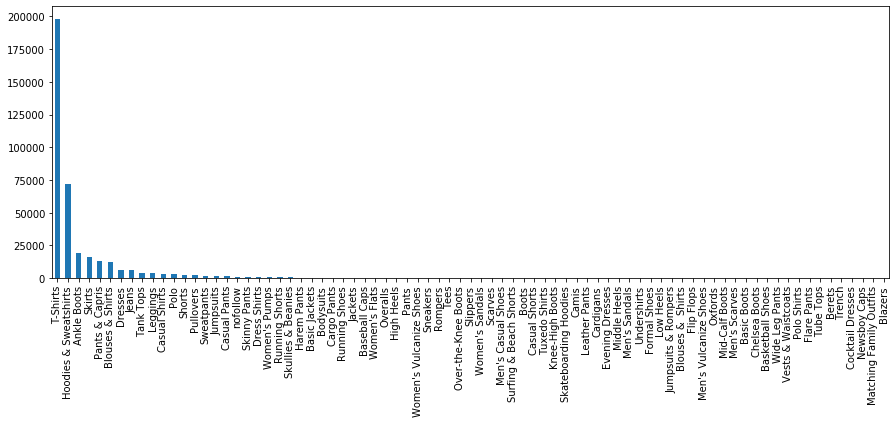

In [8]:
df.category.value_counts().plot(kind='bar', figsize=(15,5))

***How many unique products?***

In [9]:
len(df.id.unique())

28124

***How many colors for each product?***

In [10]:
color_counts = []
for i in df.id.unique():
    color_counts.append(len(df[df.id == i].color.unique()))
print("min: ", np.min(color_counts))
print("max: ", np.max(color_counts))
print("mean: ", np.mean(color_counts,))
print("median: ", np.median(color_counts))

min:  1
max:  58
mean:  6.037725785805717
median:  4.0


***How many images for each product?***

In [11]:
image_counts = []
for i in df.id.unique():
    image_counts.append(len(df[df.id == i].url.unique()))
print("min: ", np.min(image_counts))
print("max: ", np.max(image_counts))
print("mean: ", np.mean(image_counts,))
print("median: ", np.median(image_counts))

min:  2
max:  267
mean:  13.416228132555824
median:  9.0


***Let's take a look at the photos!***

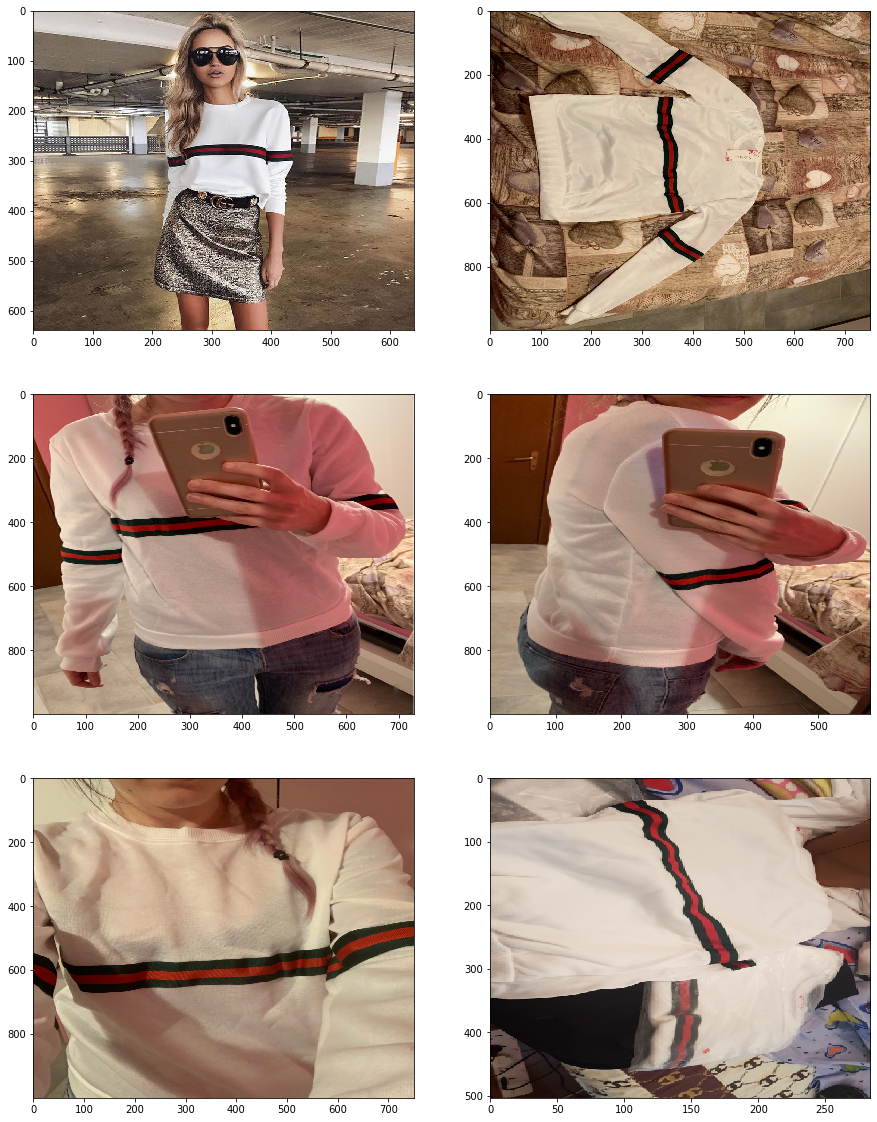

In [12]:
fig,axs  = plt.subplots(3,2 ,figsize=(15,20))
axs = axs.flatten()
for i,ax in enumerate(axs):
    ax.imshow(get_img(df, df[(df.id == 32948383864) & (df.color == 'white')].index[i]),
              interpolation='nearest', 
              aspect='auto')

***The same product, another color***

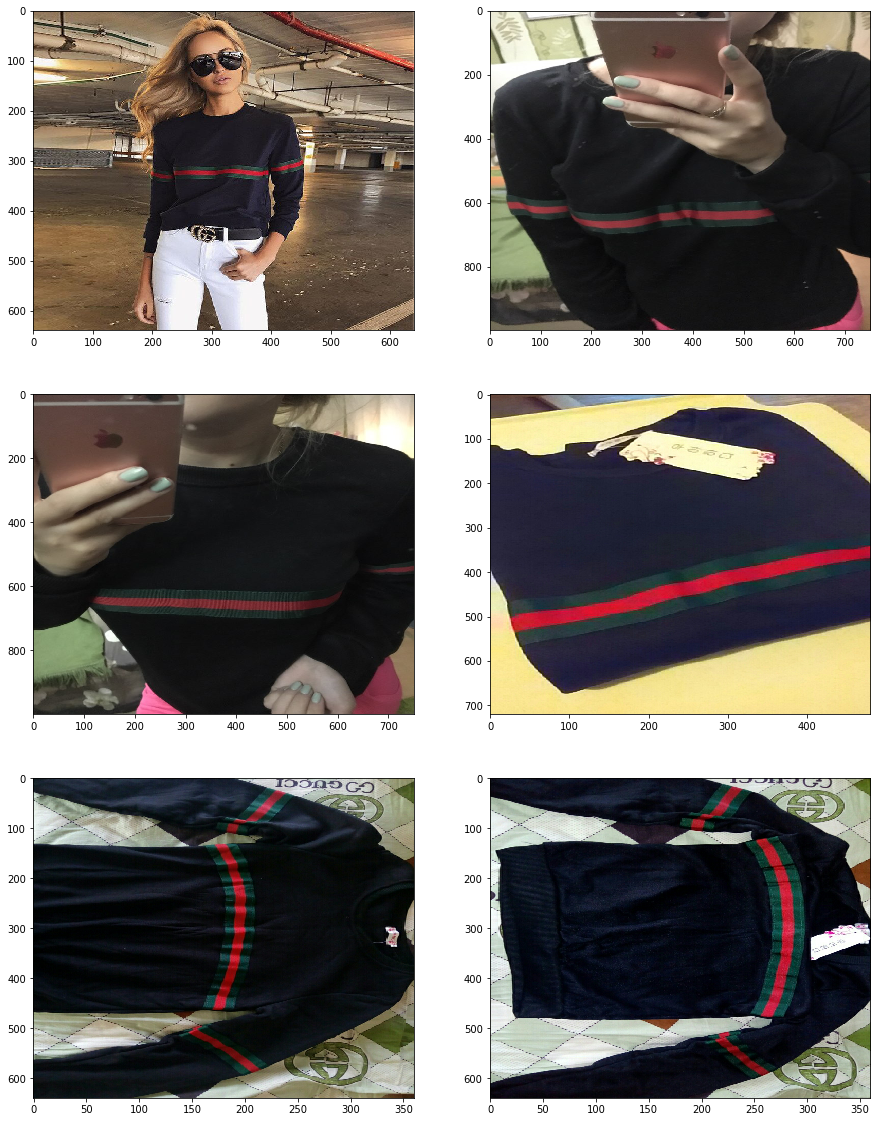

In [13]:
fig,axs  = plt.subplots(3,2 ,figsize=(15,20))
axs = axs.flatten()
for i,ax in enumerate(axs):
    ax.imshow(get_img(df, df[(df.id == 32948383864) & (df.color == 'darkblue')].index[i]),
              interpolation='nearest', 
              aspect='auto')

***Different product***

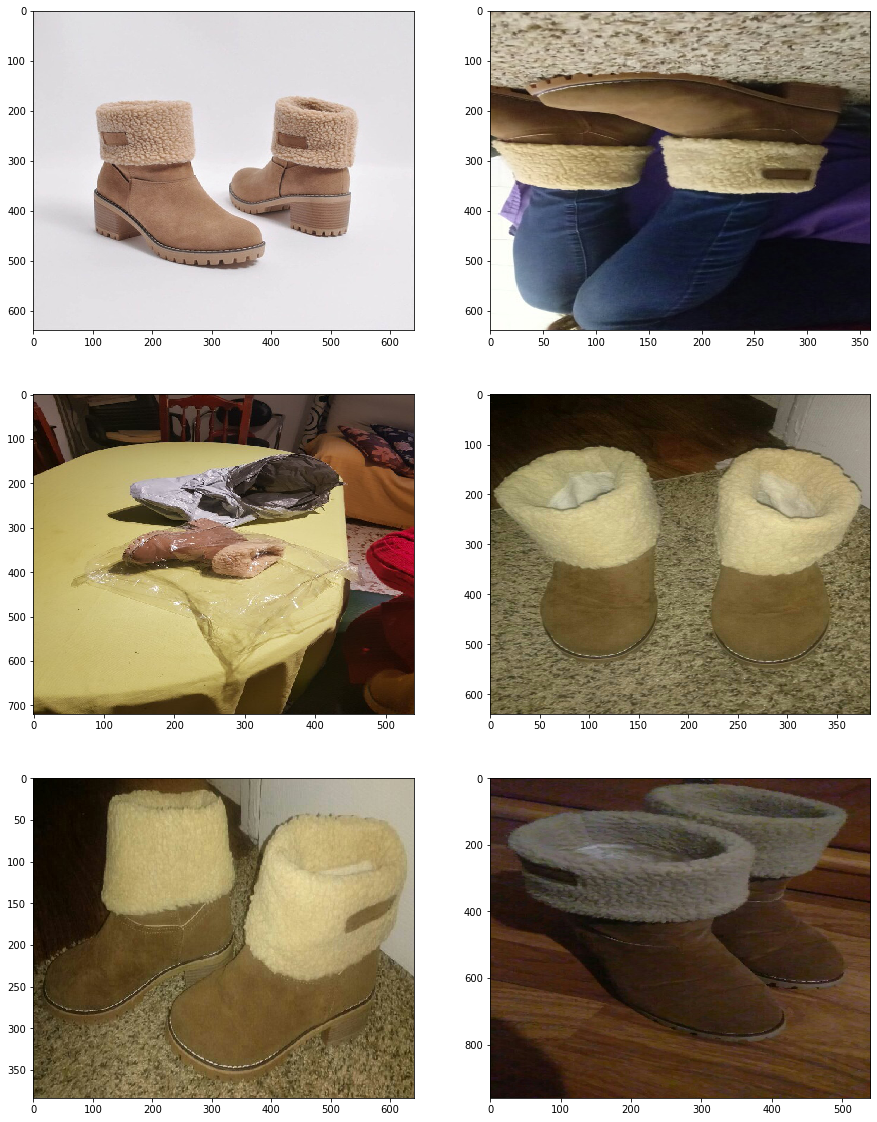

In [14]:
fig,axs  = plt.subplots(3,2 ,figsize=(15,20))
axs = axs.flatten()
for i,ax in enumerate(axs):
    ax.imshow(get_img(df, df[(df.id == 32922929371) & (df.color == 'brown')].index[i]),
              interpolation='nearest', 
              aspect='auto')